# Algerian Forest Fires Dataset EDA Project

# 1. Understanding the task

(i) Import the dataset https://www.kaggle.com/datasets/mbharti321/algerian-forest-fires-dataset-updatecsv

(ii) Do the Exploratory Data Analysis(EDA) on the dataset by completing undersatnding it and create the report

(iii) While doing EDA, perform data preprocessing steps.

## 2. DATA COLLECTION AND UNDERSTANDING

(i) I have used an Alegrian Forest Fire dataset from uci repository. This dataset contains forest fire observations from Bejaia Region. In this project,I have done exploratory data analysis on the given dataset and completely analyzed which of the forst fire features have contributed to the firing in the forests.


## 3. DATA EXPLORATION

(i) Here in the given dataset, we have explored and analysed the data using Pandas and visualized the results using Matplotlib.

## 4. Tasks to be performed while doing EDA

(i)  Importing all the necessary libraries

(ii) Data Cleaning for EDA Report

(iii) Performing EDA on all the features of the dataset.

# DATA COLLECTION AND SUMMARY

In [33]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [34]:
# Loading the dataset
data = pd.read_csv('Algerian_forest_fires_dataset.csv')

In [35]:
# display the first five rows of the dataset
print(data.head())

  day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0   1     6  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1   2     6  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2   3     6  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3   4     6  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4   5     6  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire     


In [36]:
# display the last five rows of the dataset
print(data.tail())

    day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
242  26     9  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
243  27     9  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
244  28     9  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
245  29     9  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
246  30     9  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    
242  6.5       fire     
243    0   not fire     
244  0.2   not fire     
245  0.7   not fire     
246  0.5  not fire      


In [37]:
# checking the type of the data
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [38]:
# Give the detailed information about all the columns in the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB
None


In [39]:
# get the statistical information about all the dataset
print(data.describe())

        day month  year Temperature   RH   Ws Rain   FFMC  DMC   DC  ISI  BUI  \
count   246   245   245         245  245  245   245   245  245  245  245  245   
unique   33     5     2          20   63   19    40   174  167  199  107  175   
top      29     7  2012          35   55   14     0  88.9  7.9    8  1.1    3   
freq      8    62   244          29   10   43   133     8    5    5    8    5   

        FWI Classes    
count   245       244  
unique  127         9  
top     0.4   fire     
freq     12       131  


In [40]:
# Get the shape of the dataset
print(data.shape)

(247, 14)


# DATA CLEANING

In [41]:
# Checking for the NULL Values in the dataset
print(data.isnull().sum())

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64


# OBSERVATION:

(i) From the above data, it is clear that Classes column has only one NULL Value in the dataset.

In [42]:
# Checking for the missing values
data[data.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


# OBSERVATION:

From the above data, it is clear that the Classes has only one NULL Value in the dataset.

### The dataset has been converted into two sets based on the region from 122th index and we can make a new column based on Region

1. Bejaia Region Dataset

2. Sidi-Bel Abbes Region Dataset

In [43]:
# Based on the two regions, make another column named 'Region'

data.loc[:122, 'Region'] = 1
data.loc[122:, 'Region'] = 2

data[['Region']] = data[['Region']].astype('int')

In [44]:
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [45]:
# calculate the null values in each column
data.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64

In [46]:
# Drop all the null or na values
data = data.dropna().reset_index(drop = True)

In [47]:
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [48]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

# OBSERVATION:

Now there are no NULL Values in the dataset.

In [49]:
data.shape

(244, 15)

In [50]:
# Column that has string
data.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


# Null and all unwanted rows are removed

In [51]:
data.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [54]:
# List out all the columns from the dataset
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [55]:
# Spaces were fixed in the column names
data.columns = data.columns.str.strip()
print(data.columns)

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')


# Changing the Required columns to int type

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.8+ KB


In [63]:
obj_data = [res for res in data.columns if(data[res].dtypes == 'O')]

In [64]:
print(obj_data)

['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']


In [83]:
# Convert column 'A' to int, handling the error
data['month'] = pd.to_numeric(data['month'], errors='coerce')

In [86]:
for i in obj_data:
    if(i != 'Classes'):
        data[i] = pd.to_numeric(data[i], errors = 'coerce')

In [87]:
# get the complete data types of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    float64
 1   month        243 non-null    float64
 2   year         243 non-null    float64
 3   Temperature  243 non-null    float64
 4   RH           243 non-null    float64
 5   Ws           243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    int32  
dtypes: float64(13), int32(1), object(1)
memory usage: 27.8+ KB
None


# OBSERVATION:

Now all the data types of the dataset except Region has been converted into float type.

In [88]:
# Descriptive Summary of the dataset
print(data.describe().T)

             count         mean        std     min      25%     50%      75%  \
day          243.0    15.761317   8.842552     1.0     8.00    16.0    23.00   
month        243.0     7.502058   1.114793     6.0     7.00     8.0     8.00   
year         243.0  2012.000000   0.000000  2012.0  2012.00  2012.0  2012.00   
Temperature  243.0    32.152263   3.628039    22.0    30.00    32.0    35.00   
RH           243.0    62.041152  14.828160    21.0    52.50    63.0    73.50   
Ws           243.0    15.493827   2.811385     6.0    14.00    15.0    17.00   
Rain         243.0     0.762963   2.003207     0.0     0.00     0.0     0.50   
FFMC         243.0    77.842387  14.349641    28.6    71.85    83.3    88.30   
DMC          243.0    14.680658  12.393040     0.7     5.80    11.3    20.80   
DC           243.0    49.430864  47.665606     6.9    12.35    33.1    69.10   
ISI          243.0     4.742387   4.154234     0.0     1.40     3.5     7.25   
BUI          243.0    16.690535  14.2284

# Data Cleaning in the target variable

In [89]:
# Checking the unique values in target variables
data.Classes.value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
Classes            1
not fire           1
not fire           1
Name: Classes, dtype: int64

## Divide the dataset into two different regions of Bejaia and Siddi-Bel Abbes

# Region1 (Bejaia Region)

In [92]:
data[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26.0,9.0,2012.0,31.0,54.0,11.0,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,1
118,27.0,9.0,2012.0,31.0,66.0,11.0,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1
119,28.0,9.0,2012.0,32.0,47.0,14.0,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
120,29.0,9.0,2012.0,26.0,80.0,16.0,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,1


In [93]:
data[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Classes,2
123,1.0,6.0,2012.0,32.0,71.0,12.0,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
124,2.0,6.0,2012.0,30.0,73.0,13.0,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
125,3.0,6.0,2012.0,29.0,80.0,14.0,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
126,4.0,6.0,2012.0,30.0,64.0,14.0,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26.0,9.0,2012.0,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
240,27.0,9.0,2012.0,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
241,28.0,9.0,2012.0,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
242,29.0,9.0,2012.0,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [94]:
# Club all the data into one dataset
data.to_csv('Algerian_forest_fires_dataset_CLEANED.csv', index = False)

# Exploratory Data Analysis (EDA)

In [95]:
data1 = data.drop(['day', 'month', 'year'], axis = 1)

In [96]:
print(data1)

     Temperature    RH    Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  \
0           29.0  57.0  18.0   0.0  65.7   3.4   7.6  1.3   3.4  0.5   
1           29.0  61.0  13.0   1.3  64.4   4.1   7.6  1.0   3.9  0.4   
2           26.0  82.0  22.0  13.1  47.1   2.5   7.1  0.3   2.7  0.1   
3           25.0  89.0  13.0   2.5  28.6   1.3   6.9  0.0   1.7  0.0   
4           27.0  77.0  16.0   0.0  64.8   3.0  14.2  1.2   3.9  0.5   
..           ...   ...   ...   ...   ...   ...   ...  ...   ...  ...   
239         30.0  65.0  14.0   0.0  85.4  16.0  44.5  4.5  16.9  6.5   
240         28.0  87.0  15.0   4.4  41.1   6.5   8.0  0.1   6.2  0.0   
241         27.0  87.0  29.0   0.5  45.9   3.5   7.9  0.4   3.4  0.2   
242         24.0  54.0  18.0   0.1  79.7   4.3  15.2  1.7   5.1  0.7   
243         24.0  64.0  15.0   0.2  67.3   3.8  16.5  1.2   4.8  0.5   

          Classes  Region  
0     not fire          1  
1     not fire          1  
2     not fire          1  
3     not fire         

In [97]:
# Encoding not fire as 0 and fire as 1
data1['Classes'] = np.where(data1['Classes'] == 'not fire',0,1)

In [98]:
print(data1)

     Temperature    RH    Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  Classes  \
0           29.0  57.0  18.0   0.0  65.7   3.4   7.6  1.3   3.4  0.5        1   
1           29.0  61.0  13.0   1.3  64.4   4.1   7.6  1.0   3.9  0.4        1   
2           26.0  82.0  22.0  13.1  47.1   2.5   7.1  0.3   2.7  0.1        1   
3           25.0  89.0  13.0   2.5  28.6   1.3   6.9  0.0   1.7  0.0        1   
4           27.0  77.0  16.0   0.0  64.8   3.0  14.2  1.2   3.9  0.5        1   
..           ...   ...   ...   ...   ...   ...   ...  ...   ...  ...      ...   
239         30.0  65.0  14.0   0.0  85.4  16.0  44.5  4.5  16.9  6.5        1   
240         28.0  87.0  15.0   4.4  41.1   6.5   8.0  0.1   6.2  0.0        1   
241         27.0  87.0  29.0   0.5  45.9   3.5   7.9  0.4   3.4  0.2        1   
242         24.0  54.0  18.0   0.1  79.7   4.3  15.2  1.7   5.1  0.7        1   
243         24.0  64.0  15.0   0.2  67.3   3.8  16.5  1.2   4.8  0.5        1   

     Region  
0         1  

In [99]:
# check counts
data1['Classes'].value_counts()

1    242
0      2
Name: Classes, dtype: int64

##  Visualization of Distribution

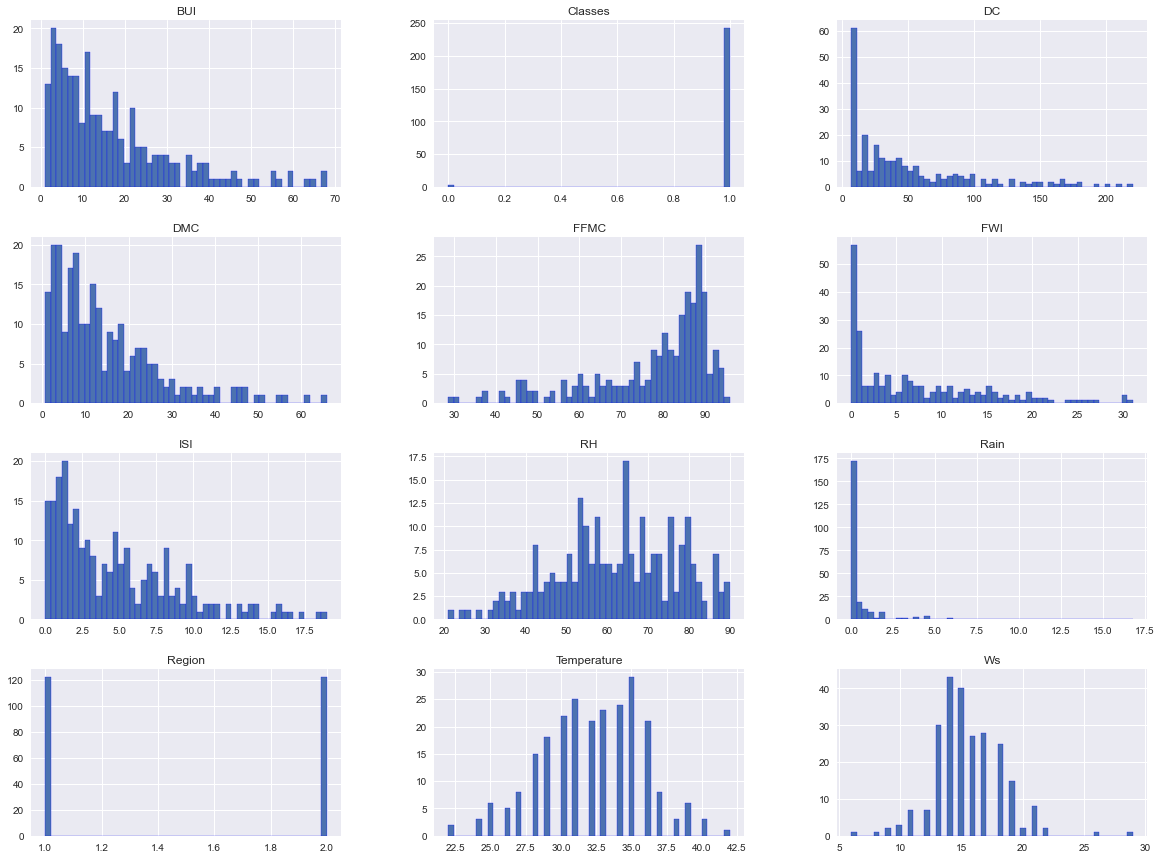

In [101]:
plt.style.use('seaborn')
data1.hist(bins = 50, figsize = (20,15), ec = 'b')
plt.show()

In [102]:
data1.Classes.value_counts()

1    242
0      2
Name: Classes, dtype: int64

In [103]:
data.Classes.value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
Classes            1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [104]:
data.Classes = data.Classes.str.strip()

In [106]:
data.Classes.value_counts()

fire        137
not fire    106
Classes       1
Name: Classes, dtype: int64

In [107]:
# Percentage for Piechart
percentage_data = data.Classes.value_counts(normalize = True)*100.0
print(percentage_data)

fire        56.147541
not fire    43.442623
Classes      0.409836
Name: Classes, dtype: float64


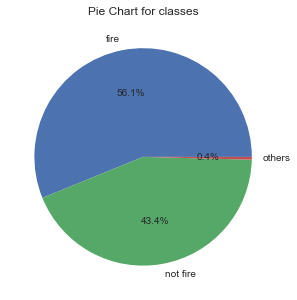

In [108]:
classes_labels = ["fire", "not fire","others"]
plt.figure(figsize = (10,5))
# plot the pie chart
plt.pie(percentage_data, labels = classes_labels, autopct = '%1.1f%%')
plt.title('Pie Chart for classes', fontsize = 12)
plt.show()

# OBSERVATION:

(i) 56.1% of the days forest has been caught in the fire.

(ii) 43.4% of the days has not been caught in the fire.

(iii) 0.4 % of the days is not defined whether fire has been caught or not.

# Month- Wise Fire Analysis For Bejaia Region

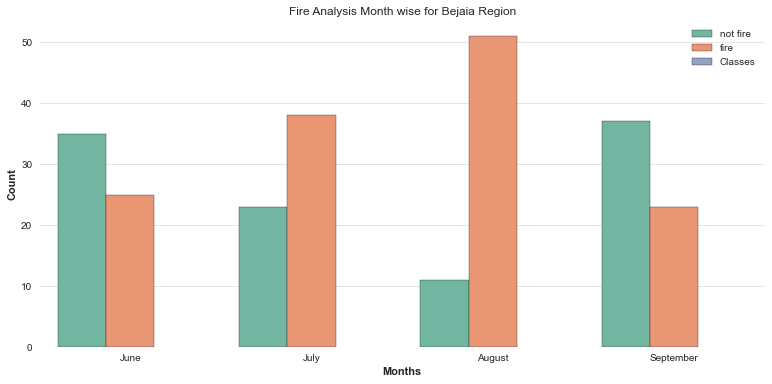

In [115]:
data[data['Region'] == 1]
plt.subplots(figsize = (13,6))
sns.set_style('whitegrid')
sns.countplot(data = data, x = 'month', hue = 'Classes', ec = 'black', palette = 'Set2')
# title of the graph
plt.title('Fire Analysis Month wise for Bejaia Region')
plt.xlabel('Months', weight = 'bold')
plt.ylabel('Count', weight = 'bold')
plt.legend(loc = 'upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5, axis = 'y')
plt.show()

# OBSERVATION:

 In the Bejaia region, August is the month where the maximum fire has taken place in the forest.
 
 July is the month where the minimum fire has taken place.

# Month- Wise Fire Analysis For Sidi-Bel Region

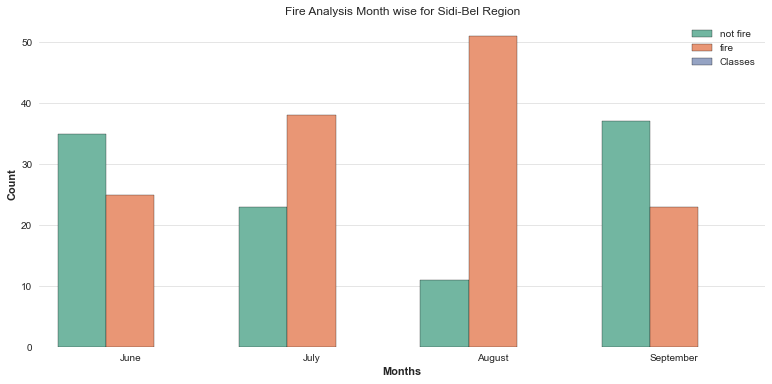

In [117]:
data[data['Region'] == 2]
plt.subplots(figsize = (13,6))
sns.set_style('whitegrid')
sns.countplot(data = data, x = 'month', hue = 'Classes', ec = 'black', palette = 'Set2')
# title of the graph
plt.title('Fire Analysis Month wise for Sidi-Bel Region')
plt.xlabel('Months', weight = 'bold')
plt.ylabel('Count', weight = 'bold')
plt.legend(loc = 'upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5, axis = 'y')
plt.show()

# OBSERVATION:

(i) In the Sidi-Bel Region, August month is the month where the maximum fire has occurred in the forest.

# Insights

(i) From the above two graphs, it is observed that the maximum number of forest fires has occurred in the month of August for both the regions.

(ii) Most of the forst fires has occurred in the month of June, July and August

# 3.5 Exploratory Data Analysis (EDA) on all Features

In [118]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [119]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [120]:
def barchart(feature, xlabel):
    plt.figure(figsize = (14,8))
    by_feature = data1.groupby([feature], as_index = False)['Classes'].sum()
    ax = sns.barplot(x = feature, y = "Classes", data = by_feature[[feature, 'Classes']], estimator = sum)
    ax.set(xlabel = xlabel, ylabel = 'Fire Count')

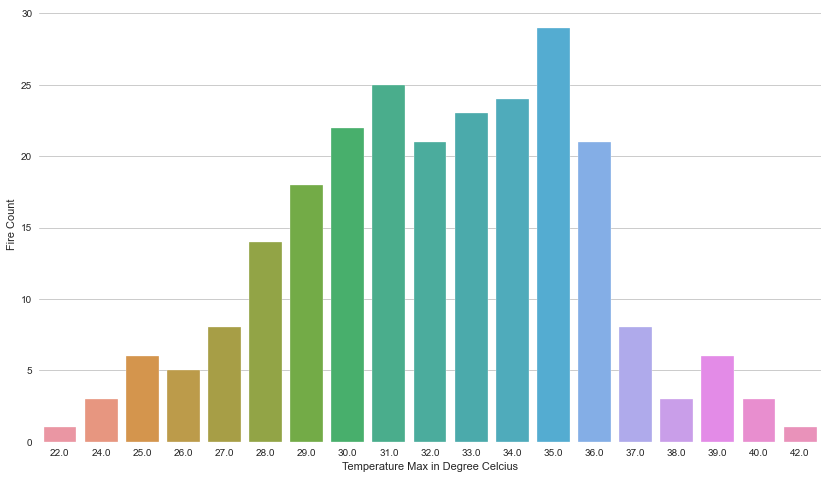

In [121]:
barchart('Temperature', 'Temperature Max in Degree Celcius')

# OBSERVATIONS:
(i) Maximum Temperature received in the forest is 35 degree celcius.

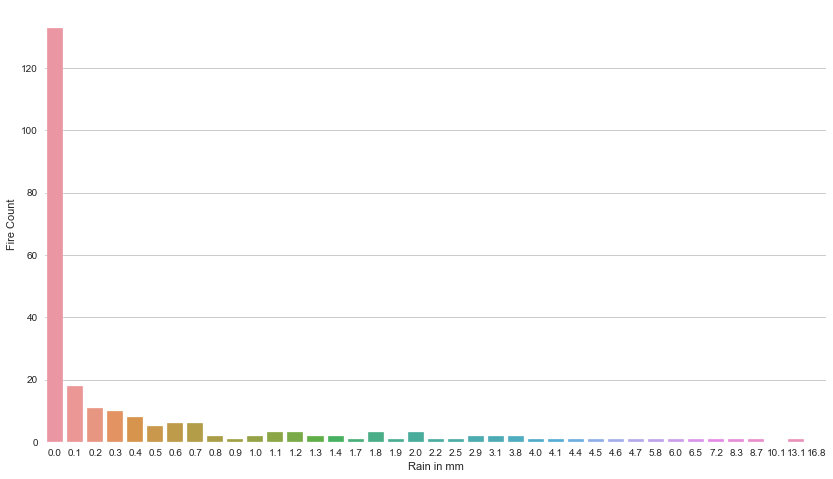

In [122]:
barchart('Rain', 'Rain in mm')

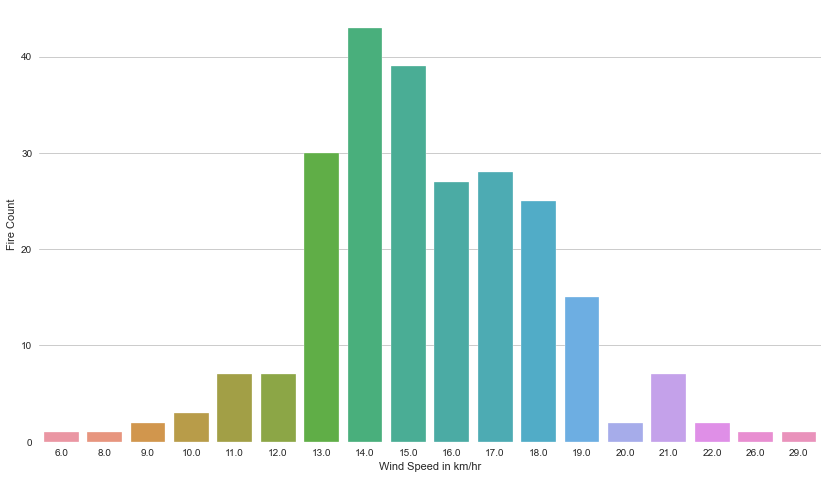

In [123]:
barchart('Ws', 'Wind Speed in km/hr')

# OBSERVATION:

(i) Maximum  Wind Speed observed is 14 km/hr.

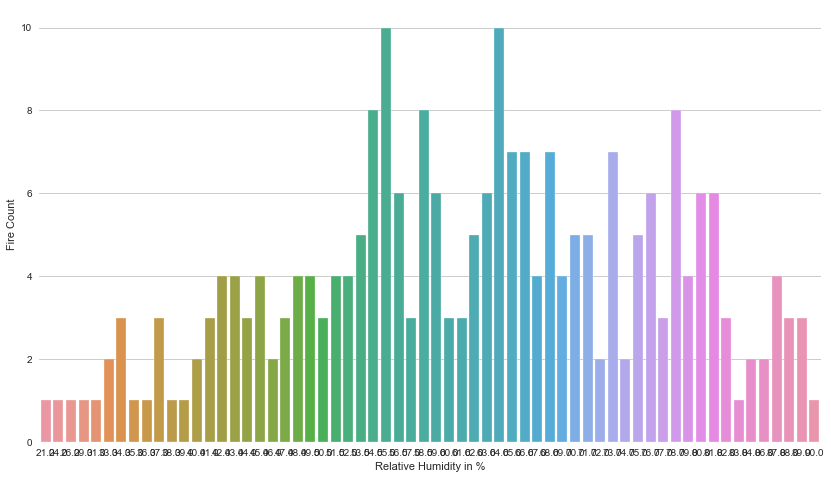

In [124]:
barchart('RH', 'Relative Humidity in %')

# OBSERVATION

(i) Maximum Relative Humidity received in the forest region is 10.

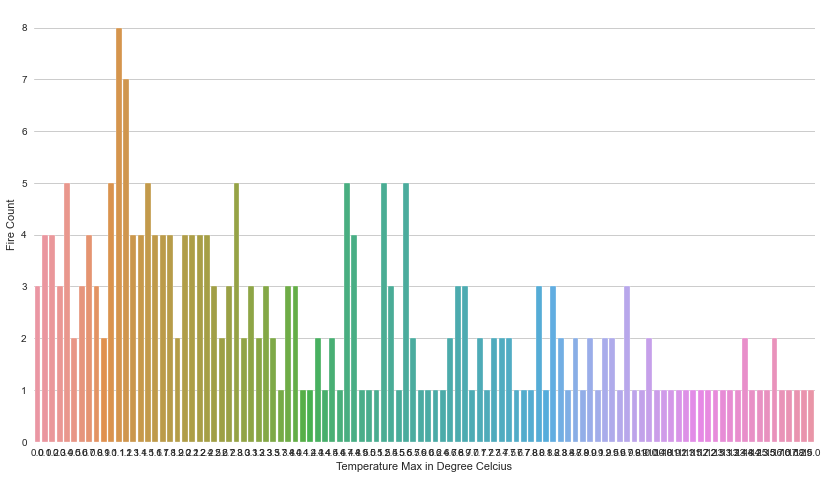

In [125]:
barchart('ISI', 'Temperature Max in Degree Celcius')

# OBSERVATION:

(i) Maximum ISI revceived for the temperature is 8.

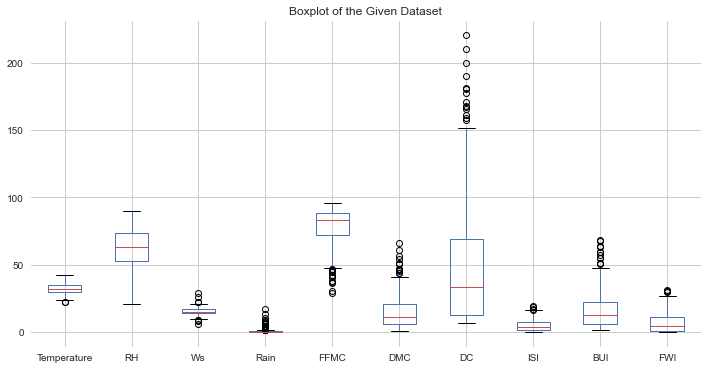

In [126]:
# To drop the columns 'Classes' and 'Regions' from the dataset
dtemp = data1.drop(['Classes', 'Region'], axis = 1)
plt.figure(figsize = (12,6))
ax = dtemp.boxplot()
ax.set_title('Boxplot of the Given Dataset')
plt.show()

REPORT

Weather System Report

1. Temperature Highest Fire counts happened between 30-37 degree Celsius

2. Rain Highest Fire counts happened when there was no rain to very less rain ie. 0.0 to 0.3.

3. Wind Speed highest Fire count happened when the wind speed were between 13 to 19 Km/hr.

4. Relative Humidity highest fire count happened when the RH is between 50 to 80%.

FWI System Components Report

FWI (Canadian Forest Fire Weather Index)

 1. Fine Fuel Moisture Code (FFMC) index which ranges between 28.6 to 92.5, here above 75 has higher chance of Forest fires.

 2. Duff Moisture Code (DMC) index which ranges between 1.1 to 65.9, here 1.1-10 has lower chance of Forest fires whereas above 10-30 DMC has very high evidence of Forest fires in past.

 3.  Drought Code (DC) index which ranges between 7 to 220.4, here 0-25 is safe and has lower chance of Forest fires whereas range above 25 DC has higher chance of forest fires.

 4. Initial Spread Index (ISI) index which ranges between 0 to 18, here 0-3 has lower Forest fires and above 3 ISI has higher chance of Forest fires.

 5. Buildup Index (BUI) index which ranges between 1.1 to 68, here 1.1 to 10 has lower Forest fire chance and above 10 BUI has higher chance of forest fires.

 6. Fire Weather Index (FWI) Index which ranges between 1 to 31.1, here 0-3 has lower chance of Forest fires and 3-25 FWI has higher chance of forest fires.